# Numpy 定义
Numpy 是一个第三方库，主要用于**数组计算**，包括：
* 一个N维的数组对象 ndarray
* 广播功能函数
* 整合 c/c++/Fortran 代码的工具
* 线性代数、傅里叶变换、随机数生成等功能

## ndarray
是一种用来**存储同类型元素的多维数组**

数据结构：
* `data`:实际数据在内存中的缓冲区
* `dtype`:数据类型，例如`int32`、`float64`
* `shape`:数组的维度信息，例如(3,4)表示 3 行 4 列
* `ndim`:数组中的维度数量，例如 2，表示2维数组
* `size`:数组中包含的所有元素
* `strides`:每个维度上移动到下一个元素所需的字节数，例如（12，4）表示每行间隔 12 个字节，每列间隔 4 个字节
* `flags`:内存布局信息（如是否连续）

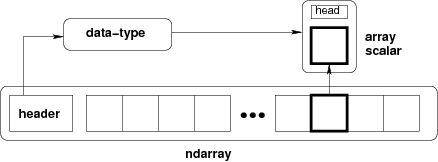

### 优缺点
优点|缺点
|:---:|:---:|
|高效计算|无法存储混合类型|
|内存连续|静态结构：创建后大小固定|
|API丰富||

### 内存特性
`ndarray` 是创建时就已经确定了内存分配和形状。一旦数组创建后，**内存块的大小和布局无法动态改变**。此外 `ndarray` 的形状调整分为两种情况：
1. 不改变总元素的调整：仅修改 `shape` 和 `strides` 属性，不会复制数据，返回视图，视图中的数据修改，原数据也会修改
2. 改变总元素的调整：


### 向量、矩阵、数组之间的关系
向量是一维数组，矩阵是二维数组，两个都是数组的特殊形式

## Numpy 常用操作
1. 创建数组
   1. 从列表或者元组中创建
   2. 创建特定模式的数组
   3. 生成随机数组
2. 数学运算
   1. 逐元素运算
   2. 矩阵运算
   3. 通用函数
3. 形状操作
   1. 调整形状，不复制数据
   2. 展平数组
   3. 拼接与分割
4. 索引与切片
   1. 基础索引
   2. 布尔索引
   3. 花式索引
5. 统计与聚合
   1. 基本统计：求和、均值、最大值
   2. 其他统计函数：标准差、方差、累计和
6. 广播
7. 文件操作：保存和加载
8. 线性代数                                          

### 创建ndarray
1. 使用列表或者元组

In [21]:
import numpy as np

print(dir(np.array(1)))
a = np.array({1, 2, 3})  # 一维数组，向量
print(a)
b = np.array([[1, 2, 3], [4, 5, 6]])  # 二维数组，矩阵
print(b)

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_namespace__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__class_getitem__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__',

In [22]:
# 创建特殊格式的数组
a = np.zeros((2,3))  # 生成两行三列的全零数组
print("a is ", a)
b = np.ones((2,3), dtype=float)  # 全 1 数组，浮点数
print(f"b is \n {b}")
c = np.empty((2,2))  # 未初始化的数组，值随机
print(c)
range_arr = np.arange(0, 10, 2)  # 0-10,2 为步长
print(range_arr)
linspace = np.linspace(0,1,5)  # 生成 0 到 1 之间均匀分布的 5 个数
print(linspace)

a is  [[0. 0. 0.]
 [0. 0. 0.]]
b is 
 [[1. 1. 1.]
 [1. 1. 1.]]
[[1. 1.]
 [1. 1.]]
[0 2 4 6 8]
[0.   0.25 0.5  0.75 1.  ]


In [23]:
# 生成随机数
rand_uniform = np.random.rand(2, 3)  # 【0，1） 均匀分布
print(rand_uniform)
rand_normal = np.random.randn(2, 3)  # 标准正太分布
print(rand_normal)
rand_int = np.random.randint(0, 10, (2, 3)) # 0-9 之间的整数
print(rand_int)

[[0.775416   0.6938586  0.2437658 ]
 [0.57193044 0.19084205 0.34232884]]
[[ 0.19847666 -1.53758438  0.39030222]
 [-1.49911456 -0.2732052  -0.01888216]]
[[9 3 8]
 [5 2 4]]


### 数学运算

In [24]:
# 元素级
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

add = a + b       # [5, 7, 9]
sub = a - b       # [-3, -3, -3]
mul = a * b       # [4, 10, 18]
div = b / a       # [4.0, 2.5, 2.0]
power = a ** 2    # [1, 4, 9]
sqrt = np.sqrt(a) # [1.0, 1.414, 1.732]


# 矩阵运算
dot_product = np.dot(a, b)  #  矩阵乘法，等价于 mat1 @ mat2
print(dot_product)


# 通用函数
sin_values = np.sin(a)         # 计算正弦
log_values = np.log(a)         # 自然对数
exp_values = np.exp(a)         # 指数函数

32


### 形状操作

In [25]:
# 调整形状，不复制数据
arr = np.arange(6)
reshaped = arr.reshape(2, 3)
print(reshaped)


# 展平数组
flattened = reshaped.flatten()  # 返回一维副本：[0, 1, 2, 3, 4, 5]
print(flattened)
raveled = reshaped.ravel()  # 返回一维视图
print(raveled)

# 拼接与分割
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])

# 垂直拼接（沿行方向）
vstack = np.vstack((a, b))  # [[1, 2], [3, 4], [5, 6]]
print(vstack)

# 水平分割
split_arr = np.hsplit(a, 2)  # [array([[1], [3]]), array([[2], [4]])]
print(split_arr)

[[0 1 2]
 [3 4 5]]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[[1 2]
 [3 4]
 [5 6]]
[array([[1],
       [3]]), array([[2],
       [4]])]


## 广播机制
广播机制一种允许不同形状的数组进行逐元素运算的规则。

### 核心规则：
两个数组的维度从最右侧开始对齐，逐个维度检查是否可以满足如下条件：
1. 维度相等：两个数组在该维度上的大小相同
2. 维度为1：其中一个数组在该维度的大小为1，可以扩展到另一个数组的大小
3. 维度缺失：可视为维度为1

### 广播步骤
假设 `A` 的形状为（3，1，4），数组 `B` 的形状为（2，1）
1. 维度从最右侧对齐
2. 扩展缺失维度，`B` 大小变成（1，2，1）
3. 扩展大小为1的维度
4. 逐元素进行运算

### 内存空间
广播机制不会改变原始数据，只是修改 `shape` 和 `strides` 来实现，在哪维度复制，`strides` 里面的维度就为0.并且逻辑扩展仅在运算过程中临时存在，运算完成后，广播的元数据被丢弃，原始数组的 shape 和 strides 保持不变。

In [26]:
# 广播的限制，若数组形状不满足广播规则，将抛出错误：
a = np.ones((3, 4))
b = np.ones((3, 2))
try:
    a + b
except ValueError as e:
    print(e)  # 输出 "operands could not be broadcast together with shapes (3,4) (2,5)"

operands could not be broadcast together with shapes (3,4) (3,2) 


### 应用场景
1. 归一化数据：所有的数据减去均值
2. 图像处理：例如对每个通道亮度增加值
3. 机器学习权重更新

In [27]:
# 1. 归一化数据：
data = np.random.rand(100, 3)  # 100个样本，3个特征
mean = data.mean(axis=0)       # 形状 (3,)
normalized = data - mean       # 广播减去均值

# 2.图像处理：
image = np.random.randint(0, 256, (256, 256, 3))  # RGB图像
brightness_boost = np.array([10, 20, 30])          # 各通道亮度增强值
brightened_image = image + brightness_boost        # 广播到每个像素

# 3. 机器学习参数更新：
weights = np.random.randn(10, 5)  # 权重矩阵
gradients = np.random.randn(5)     # 梯度向量
weights -= 0.1 * gradients         # 广播更新所有行
# print(weights)

## 参考资料
[理解numpy中ndarray的内存布局和设计哲学](https://www.cnblogs.com/shine-lee/p/12293097.html "博客")